<a href="https://colab.research.google.com/github/AndreiAf02/Data-Balancing-in-ML-DNN/blob/main/Diabetes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Diabetes Health Indicators - ML Classification with Random Under/Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)



In [4]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [5]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [6]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [7]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571,1
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [8]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


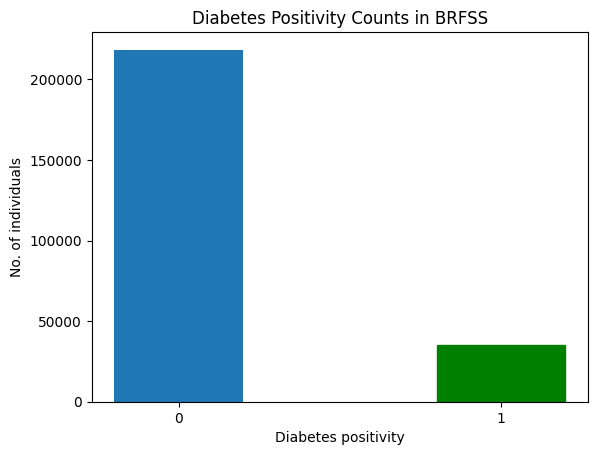

In [9]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

# Full Dataset:

In [10]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


In [11]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


## DNN Classification Algorithm:

In [12]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate_ml(model, X_train, X_test, y_train, y_test, domain):

    # time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)

    # conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # ## To deactivate after!!! ----------------------------------------
    # ##### Plot ROC curve and Confusion Matrix side by side
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # # ROC Curve
    # ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    # ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # ax1.set_xlabel('False Positive Rate')
    # ax1.set_ylabel('True Positive Rate')
    # ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    # ax1.legend(loc='lower right')
    # ax1.grid()

    # # Confusion Matrix
    # conf_disp.plot(ax=ax2, cmap='Blues')
    # ax2.set_title('Confusion Matrix')
    # plt.tight_layout()
    # plt.show()
    ## To deactivate after!!! ----------------------------------------

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    return fpr, tnr, fnr, tpr


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [14]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (202944, 21)
y_train: (202944, 1)
X_test: (50736, 21)
y_test: (50736, 1)


In [15]:
## Establishing the Under/Oversampling values and imbalance ratio:

undersample_size = min(data_train['Diabetes_binary'].value_counts())
oversample_size = max(data_train['Diabetes_binary'].value_counts())


data_majority = data_train[data_train['Diabetes_binary']==0]
data_minority = data_train[data_train['Diabetes_binary']==1]

print(undersample_size)
print(oversample_size)

28135
174809


## Imbalanced (Original) data:

In [ ]:
times = 10

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
    model_source = create_dnn_model(X_train.shape[1])
    result_imbalanced = train_and_evaluate_ml(model_source, X_train, X_test, y_train, y_test, "Source")
    # result_TL_imbalanced = Transductive_TL(model_source, X_T_full, y_T_full, "Target")

    FPR.append(result_imbalanced[0])
    TNR.append(result_imbalanced[1])
    FNR.append(result_imbalanced[2])
    TPR.append(result_imbalanced[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - AUC: 0.7808 - loss: 0.3405 - val_AUC: 0.8218 - val_loss: 0.3146
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8225 - loss: 0.3175 - val_AUC: 0.8248 - val_loss: 0.3135
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8237 - loss: 0.3124 - val_AUC: 0.8263 - val_loss: 0.3124
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8251 - loss: 0.3157 - val_AUC: 0.8261 - val_loss: 0.3121
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8280 - loss: 0.3147 - val_AUC: 0.8273 - val_loss: 0.3115
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8275 - loss: 0.3118 - val_AUC: 0.8276 - val_loss: 0.3110
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8291 - loss: 0.3135 - val_AUC: 0.8271 - val_loss: 0.3141
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - AUC: 0.8278 - loss: 0.3119 - val_AUC: 0.8266 - val_loss: 0.3121
Epoch 9/10
5074/5074 ━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7870 - loss: 0.3369 - val_AUC: 0.8220 - val_loss: 0.3178
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8230 - loss: 0.3154 - val_AUC: 0.8234 - val_loss: 0.3137
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8243 - loss: 0.3151 - val_AUC: 0.8226 - val_loss: 0.3143
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8252 - loss: 0.3145 - val_AUC: 0.8254 - val_loss: 0.3136
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8251 - loss: 0.3158 - val_AUC: 0.8263 - val_loss: 0.3121
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8264 - loss: 0.3144 - val_AUC: 0.8265 - val_loss: 0.3120
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8275 - loss: 0.3121 - val_AUC: 0.8268 - val_loss: 0.3119
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8280 - loss: 0.3136 - val_AUC: 0.8266 - val_loss: 0.3116
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7752 - loss: 0.3405 - val_AUC: 0.8218 - val_loss: 0.3158
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8208 - loss: 0.3150 - val_AUC: 0.8248 - val_loss: 0.3129
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8221 - loss: 0.3155 - val_AUC: 0.8259 - val_loss: 0.3120
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8224 - loss: 0.3150 - val_AUC: 0.8249 - val_loss: 0.3130
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8251 - loss: 0.3158 - val_AUC: 0.8267 - val_loss: 0.3119
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8286 - loss: 0.3122 - val_AUC: 0.8264 - val_loss: 0.3125
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8279 - loss: 0.3139 - val_AUC: 0.8265 - val_loss: 0.3124
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8283 - loss: 0.3154 - val_AUC: 0.8266 - val_loss: 0.3124
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - AUC: 0.7782 - loss: 0.3428 - val_AUC: 0.8219 - val_loss: 0.3191
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8221 - loss: 0.3174 - val_AUC: 0.8239 - val_loss: 0.3132
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8227 - loss: 0.3167 - val_AUC: 0.8264 - val_loss: 0.3133
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8276 - loss: 0.3127 - val_AUC: 0.8263 - val_loss: 0.3122
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8265 - loss: 0.3144 - val_AUC: 0.8268 - val_loss: 0.3116
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8250 - loss: 0.3167 - val_AUC: 0.8252 - val_loss: 0.3129
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8281 - loss: 0.3144 - val_AUC: 0.8269 - val_loss: 0.3120
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8253 - loss: 0.3126 - val_AUC: 0.8271 - val_loss: 0.3122
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7772 - loss: 0.3423 - val_AUC: 0.8217 - val_loss: 0.3156
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8214 - loss: 0.3178 - val_AUC: 0.8257 - val_loss: 0.3128
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8229 - loss: 0.3160 - val_AUC: 0.8237 - val_loss: 0.3154
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8263 - loss: 0.3134 - val_AUC: 0.8267 - val_loss: 0.3144
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8244 - loss: 0.3143 - val_AUC: 0.8261 - val_loss: 0.3142
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.8280 - loss: 0.3115 - val_AUC: 0.8259 - val_loss: 0.3128
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8295 - loss: 0.3121 - val_AUC: 0.8259 - val_loss: 0.3121
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8284 - loss: 0.3121 - val_AUC: 0.8275 - val_loss: 0.3110
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.7802 - loss: 0.3395 - val_AUC: 0.8225 - val_loss: 0.3161
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8198 - loss: 0.3185 - val_AUC: 0.8252 - val_loss: 0.3131
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8209 - loss: 0.3163 - val_AUC: 0.8238 - val_loss: 0.3192
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8249 - loss: 0.3149 - val_AUC: 0.8265 - val_loss: 0.3120
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8238 - loss: 0.3160 - val_AUC: 0.8256 - val_loss: 0.3137
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8260 - loss: 0.3135 - val_AUC: 0.8264 - val_loss: 0.3120
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8284 - loss: 0.3131 - val_AUC: 0.8259 - val_loss: 0.3155
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8292 - loss: 0.3118 - val_AUC: 0.8253 - val_loss: 0.3125
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7800 - loss: 0.3381 - val_AUC: 0.8230 - val_loss: 0.3162
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8207 - loss: 0.3183 - val_AUC: 0.8243 - val_loss: 0.3136
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8242 - loss: 0.3143 - val_AUC: 0.8265 - val_loss: 0.3125
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8256 - loss: 0.3143 - val_AUC: 0.8264 - val_loss: 0.3118
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8242 - loss: 0.3147 - val_AUC: 0.8266 - val_loss: 0.3118
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8276 - loss: 0.3126 - val_AUC: 0.8264 - val_loss: 0.3121
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8256 - loss: 0.3148 - val_AUC: 0.8259 - val_loss: 0.3171
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8286 - loss: 0.3125 - val_AUC: 0.8269 - val_loss: 0.3114
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7878 - loss: 0.3350 - val_AUC: 0.8216 - val_loss: 0.3167
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.8235 - loss: 0.3167 - val_AUC: 0.8241 - val_loss: 0.3133
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8221 - loss: 0.3160 - val_AUC: 0.8256 - val_loss: 0.3126
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8245 - loss: 0.3172 - val_AUC: 0.8270 - val_loss: 0.3128
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8258 - loss: 0.3142 - val_AUC: 0.8240 - val_loss: 0.3177
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8271 - loss: 0.3133 - val_AUC: 0.8273 - val_loss: 0.3111
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8300 - loss: 0.3125 - val_AUC: 0.8272 - val_loss: 0.3122
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.8276 - loss: 0.3131 - val_AUC: 0.8269 - val_loss: 0.3116
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.7820 - loss: 0.3378 - val_AUC: 0.8216 - val_loss: 0.3146
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.8234 - loss: 0.3171 - val_AUC: 0.8249 - val_loss: 0.3126
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8243 - loss: 0.3141 - val_AUC: 0.8263 - val_loss: 0.3118
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8271 - loss: 0.3147 - val_AUC: 0.8245 - val_loss: 0.3136
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8267 - loss: 0.3144 - val_AUC: 0.8256 - val_loss: 0.3123
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8268 - loss: 0.3141 - val_AUC: 0.8262 - val_loss: 0.3148
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8279 - loss: 0.3122 - val_AUC: 0.8264 - val_loss: 0.3121
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8306 - loss: 0.3113 - val_AUC: 0.8264 - val_loss: 0.3119
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.7782 - loss: 0.3404 - val_AUC: 0.8205 - val_loss: 0.3183
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.8213 - loss: 0.3186 - val_AUC: 0.8247 - val_loss: 0.3131
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8265 - loss: 0.3149 - val_AUC: 0.8260 - val_loss: 0.3142
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8245 - loss: 0.3165 - val_AUC: 0.8269 - val_loss: 0.3122
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8247 - loss: 0.3148 - val_AUC: 0.8268 - val_loss: 0.3123
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8268 - loss: 0.3145 - val_AUC: 0.8263 - val_loss: 0.3122
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - AUC: 0.8295 - loss: 0.3135 - val_AUC: 0.8267 - val_loss: 0.3117
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.8265 - loss: 0.3123 - val_AUC: 0.8249 - val_loss: 0.3128
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Imbalanced.csv')

        FPR       TPR       FNR       TNR
0  0.010500  0.112328  0.887672  0.989500
1  0.017622  0.160311  0.839689  0.982378
2  0.025365  0.201775  0.798225  0.974635
3  0.028260  0.223825  0.776175  0.971740
4  0.018472  0.162529  0.837471  0.981528
5  0.011878  0.128692  0.871308  0.988122
6  0.012613  0.130911  0.869089  0.987387
7  0.016933  0.160172  0.839828  0.983067
8  0.013372  0.126335  0.873665  0.986628
9  0.014360  0.141173  0.858827  0.985640


In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.8451948412148106
StDev FNR: 0.035185423944164934


# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS_train = data_SRS_RUS.iloc[:, :21]
    y_SRS_train = data_SRS_RUS.iloc[:, 21]
    model_SRS = create_dnn_model(X_SRS_train.shape[1])
    result_SRS = train_and_evaluate_ml(model_SRS, X_SRS_train, X_test, y_SRS_train, y_test, "Source")

    FPR.append(result_SRS[0])
    TNR.append(result_SRS[1])
    FNR.append(result_SRS[2])
    TPR.append(result_SRS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7797 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.7072
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8159 - loss: 0.5020 - val_AUC: 0.0000e+00 - val_loss: 0.6622
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8192 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.7229
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7178
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8274 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6693
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7282
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6673
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8328 - loss: 0.4817 - val_AUC: 0.0000e+00 - val_loss: 0.7196
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7792 - loss: 0.5379 - val_AUC: 0.0000e+00 - val_loss: 0.6049
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8159 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.6911
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6756
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6693
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7584
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8267 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6550
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8291 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6809
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8303 - loss: 0.4852 - val_AUC: 0.0000e+00 - val_loss: 0.7123
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7767 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.7217
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8187 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.7107
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8192 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.6703
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8235 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6001
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.5775
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7823
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8224 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6612
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8277 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.7411
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7674 - loss: 0.5470 - val_AUC: 0.0000e+00 - val_loss: 0.5005
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8192 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.6772
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8186 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.5721
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8213 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.6138
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6945
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6510
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7357
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8254 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7271
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7702 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7446
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.5379
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8228 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7145
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8191 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.7300
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8283 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6563
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8267 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.7046
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7805
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8313 - loss: 0.4825 - val_AUC: 0.0000e+00 - val_loss: 0.7351
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7752 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7678
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8156 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8199 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6942
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8206 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.5920
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.5763
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8199 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6046
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8275 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7137
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6991
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7825 - loss: 0.5384 - val_AUC: 0.0000e+00 - val_loss: 0.6539
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8159 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.8128
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8188 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.6563
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8210 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.7430
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7134
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8232 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6178
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8288 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.6741
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6632
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7707 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.7168
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8134 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.6656
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.8114
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8227 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6819
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6008
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8277 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6751
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8259 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7039
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.9088
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7709 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.7388
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8159 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.6643
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8214 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.8405
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8210 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.8157
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8276 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6058
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8245 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7243
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6717
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8266 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6887
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7723 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.5850
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8138 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.5736
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8233 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6742
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6867
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8266 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7893
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8230 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.5774
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8265 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7621
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.5900
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7731 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.7681
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.7533
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8200 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6836
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6479
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8267 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7487
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.6367
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6975
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8300 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.8195
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7768 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7929
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4970 - val_AUC: 0.0000e+00 - val_loss: 0.5827
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6846
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8238 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6871
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7046
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8281 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7785
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6704
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7682 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.7679
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.5928
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8195 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.7691
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8215 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.4598
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8202 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.7021
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8298 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.8289
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6047
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.7146
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7798 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.7356
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8187 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.6475
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8214 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.7067
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7438
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7472
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8276 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6990
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6818
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6870
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7762 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.8615
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8182 - loss: 0.5002 - val_AUC: 0.0000e+00 - val_loss: 0.7874
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8225 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6420
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6765
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6205
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.7198
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7054
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6885
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7824 - loss: 0.5365 - val_AUC: 0.0000e+00 - val_loss: 0.7470
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8160 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.7407
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7858
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7598
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8254 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7071
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8299 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7684
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6726
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8262 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7287
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7729 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.8292
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.7303
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8215 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.7271
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8207 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.7241
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8192 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.6585
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.7770
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8241 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7011
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8245 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6458
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7779 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.6576
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8164 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.7843
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8195 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.5685
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6760
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8241 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5850
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8259 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6117
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.6310
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8281 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6258
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7804 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.7056
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8172 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.6808
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8218 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6615
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8215 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6618
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8259 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6202
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8273 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7208
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.5825
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6856
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7807 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.7117
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8135 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8181 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.6219
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8237 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6451
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6710
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.7414
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.7317
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7733 - loss: 0.5409 - val_AUC: 0.0000e+00 - val_loss: 0.6820
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8148 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.7152
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8220 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6207
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6635
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.5987
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8248 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.7027
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.8248
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.5736
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7699 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.5692
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8113 - loss: 0.5059 - val_AUC: 0.0000e+00 - val_loss: 0.7510
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8186 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.7470
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8217 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7226
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6764
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6347
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8224 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.8579
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7747
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7625 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7456
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8132 - loss: 0.5060 - val_AUC: 0.0000e+00 - val_loss: 0.6627
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8206 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8191 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.7318
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8219 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6988
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7874
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7736
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7185
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7690 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.6152
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.8153 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.7318
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8167 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.6080
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.7641
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6748
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8253 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7347
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6321
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8278 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7277
Epoch 9/10
1407/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7779 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.8230
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8126 - loss: 0.5038 - val_AUC: 0.0000e+00 - val_loss: 0.6958
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.7914
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8196 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.8065
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.7458
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8214 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6688
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8222 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.7603
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7376
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7704 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.7234
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8133 - loss: 0.5047 - val_AUC: 0.0000e+00 - val_loss: 0.8038
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8206 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.7434
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7399
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8245 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7770
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8291 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.5930
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.6577
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7786
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7706 - loss: 0.5438 - val_AUC: 0.0000e+00 - val_loss: 0.7877
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8142 - loss: 0.5044 - val_AUC: 0.0000e+00 - val_loss: 0.5045
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8245 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.5856
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8201 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7020
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8254 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.7530
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7288
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8267 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6338
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8293 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.6571
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7821 - loss: 0.5356 - val_AUC: 0.0000e+00 - val_loss: 0.6292
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8179 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.6666
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8226 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.7058
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6837
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8254 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6475
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8305 - loss: 0.4848 - val_AUC: 0.0000e+00 - val_loss: 0.6955
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6597
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8302 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.6944
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7771 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.5069
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8155 - loss: 0.5016 - val_AUC: 0.0000e+00 - val_loss: 0.5565
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8236 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6183
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6473
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.5885
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6668
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6507
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6974
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7850 - loss: 0.5349 - val_AUC: 0.0000e+00 - val_loss: 0.8012
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8157 - loss: 0.5013 - val_AUC: 0.0000e+00 - val_loss: 0.6363
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7309
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7523
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8226 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7860
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.6233
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7562
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.6599
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7739 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.8120
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8131 - loss: 0.5044 - val_AUC: 0.0000e+00 - val_loss: 0.8084
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8209 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7333
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8201 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.6332
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6542
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.6038
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8238 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7060
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6391
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7723 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7799
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8132 - loss: 0.5031 - val_AUC: 0.0000e+00 - val_loss: 0.6953
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8151 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.7847
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8190 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6534
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8239 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6144
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6895
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6158
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8251 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6314
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7744 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.7138
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8172 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.7795
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8191 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7603
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8237 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.4841
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7066
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7451
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8274 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6427
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6325
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7753 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.7801
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8153 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.6329
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7218
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6698
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8227 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6326
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7333
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.7299
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7709 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.6133
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8157 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.7000
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6758
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8230 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.5887
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7263
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8247 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7095
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8247 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.5820
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6928
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7858 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8192 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.6621
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6392
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7776
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6401
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6951
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8325 - loss: 0.4826 - val_AUC: 0.0000e+00 - val_loss: 0.8284
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8294 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7771 - loss: 0.5394 - val_AUC: 0.0000e+00 - val_loss: 0.5760
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.6307
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8200 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.7683
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8192 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6462
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6768
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8285 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.5344
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8258 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6297
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8304 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.7135
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7826 - loss: 0.5369 - val_AUC: 0.0000e+00 - val_loss: 0.6656
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8189 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.7789
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8204 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6834
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6750
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8269 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7869
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6724
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8329 - loss: 0.4824 - val_AUC: 0.0000e+00 - val_loss: 0.7011
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8271 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7781
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7746 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.8276
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8195 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.6847
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6377
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8208 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.7600
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.6809
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8295 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.7420
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8275 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.8224
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8287 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.7736
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7827 - loss: 0.5367 - val_AUC: 0.0000e+00 - val_loss: 0.8697
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8153 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.6634
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4962 - val_AUC: 0.0000e+00 - val_loss: 0.6681
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8173 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6852
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8190 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.5512
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8250 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7142
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8228 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6139
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8292 - loss: 0.4851 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7714 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.6777
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8113 - loss: 0.5056 - val_AUC: 0.0000e+00 - val_loss: 0.6677
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8184 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.7471
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8215 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7388
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6526
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.7085
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8235 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6934
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6767
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7791 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8146 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.5978
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.5943
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8245 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7648
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8284 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.5951
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7180
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6809
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8261 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7175
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7767 - loss: 0.5427 - val_AUC: 0.0000e+00 - val_loss: 0.7511
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8145 - loss: 0.5031 - val_AUC: 0.0000e+00 - val_loss: 0.7186
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8191 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.6989
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8257 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6445
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.6219
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7590
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8286 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.7554
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8293 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7499
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7817 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.7531
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8189 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.7294
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8244 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6815
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7543
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8213 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6870
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7160
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8341 - loss: 0.4815 - val_AUC: 0.0000e+00 - val_loss: 0.6595
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8296 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.7315
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7774 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.6189
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8141 - loss: 0.5047 - val_AUC: 0.0000e+00 - val_loss: 0.7329
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8185 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.6600
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8255 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7438
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8287 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.8243
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8284 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.6917
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7212
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7618 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.5694
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8165 - loss: 0.5002 - val_AUC: 0.0000e+00 - val_loss: 0.7728
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6668
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8245 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.5905
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7256
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8290 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.5853
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8296 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6560
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7776 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.8368
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8127 - loss: 0.5059 - val_AUC: 0.0000e+00 - val_loss: 0.5461
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8185 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.6731
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6954
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7113
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8263 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7073
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7000
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.5578
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7673 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.8257
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8182 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.8422
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7536
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8262 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7414
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6786
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6261
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8285 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.8149
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8244 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6529
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7855 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.6820
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8156 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.7328
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8202 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6912
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7057
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7092
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8262 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7334
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7123
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.8004
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7674 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.7023
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8181 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.7188
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6111
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8210 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.8906
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.5850
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6337
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8252 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7697
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6547
Epoch 9/10
1407/140

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.245009  0.740813  0.259187  0.754991
1   0.179414  0.644848  0.355152  0.820586
2   0.241884  0.737207  0.262793  0.758116
3   0.232165  0.725697  0.274303  0.767835
4   0.226904  0.717792  0.282208  0.773096
5   0.229431  0.723894  0.276106  0.770569
6   0.160138  0.613646  0.386354  0.839862
7   0.196623  0.674109  0.325891  0.803377
8   0.196829  0.674802  0.325198  0.803171
9   0.185801  0.652753  0.347247  0.814199
10  0.204319  0.685342  0.314658  0.795681
11  0.208156  0.691721  0.308279  0.791844
12  0.200276  0.676189  0.323811  0.799724
13  0.201838  0.680488  0.319512  0.798162
14  0.237197  0.726390  0.273610  0.762803
15  0.213303  0.701151  0.298849  0.786697
16  0.169443  0.629871  0.370129  0.830557
17  0.179897  0.645403  0.354597  0.820103
18  0.223917  0.713909  0.286091  0.776083
19  0.169994  0.626681  0.373319  0.830006
20  0.197725  0.676189  0.323811  0.802275
21  0.239862  0.734017  0.265983  0.760138
22  0.19724

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3253834419636666
StDev FNR: 0.037661301499991064


## Simple Random Sampling with Replacement:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRSwR_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRSwR_train = data_SRSwR_RUS.iloc[:, :21]
    y_SRSwR_train = data_SRSwR_RUS.iloc[:, 21]
    model_SRSwR = create_dnn_model(X_SRSwR_train.shape[1])
    result_SRSwR = train_and_evaluate_ml(model_SRSwR, X_SRSwR_train, X_test, y_SRSwR_train, y_test, "Source")

    FPR.append(result_SRSwR[0])
    TNR.append(result_SRSwR[1])
    FNR.append(result_SRSwR[2])
    TPR.append(result_SRSwR[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7689 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.6474
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8161 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.5364
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8197 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.7338
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8235 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6905
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7702
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.5616
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8264 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6834
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6702
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7820 - loss: 0.5389 - val_AUC: 0.0000e+00 - val_loss: 0.6391
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8086 - loss: 0.5097 - val_AUC: 0.0000e+00 - val_loss: 0.6919
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8164 - loss: 0.5001 - val_AUC: 0.0000e+00 - val_loss: 0.7177
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5943
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8199 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.7031
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6992
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6540
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7002
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7675 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.9017
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8157 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.8185
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7424
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8216 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.6910
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6817
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6961
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.5580
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6284
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7697 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.6139
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8152 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.5903
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8170 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.7792
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6684
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6902
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7478
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.7526
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8291 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.6474
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7751 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.5544
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7432
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7858
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.8242
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8192 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.5832
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6901
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7159
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8281 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7274
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7742 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.7901
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8128 - loss: 0.5064 - val_AUC: 0.0000e+00 - val_loss: 0.6290
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.7538
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8221 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6174
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7832
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6802
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8324 - loss: 0.4814 - val_AUC: 0.0000e+00 - val_loss: 0.6034
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8290 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.7072
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7773 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.6112
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8150 - loss: 0.5016 - val_AUC: 0.0000e+00 - val_loss: 0.6800
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6959
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6593
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8250 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6120
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.5828
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6440
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6845
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7802 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.8105
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8173 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.8344
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.5512
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7311
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6143
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6829
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6782
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6342
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7712 - loss: 0.5470 - val_AUC: 0.0000e+00 - val_loss: 0.6591
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8164 - loss: 0.5002 - val_AUC: 0.0000e+00 - val_loss: 0.6362
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.8379
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6392
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8253 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6671
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8285 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.7556
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8317 - loss: 0.4838 - val_AUC: 0.0000e+00 - val_loss: 0.5225
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7787 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.7108
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8166 - loss: 0.4999 - val_AUC: 0.0000e+00 - val_loss: 0.6251
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8207 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.7239
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7943
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6209
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6758
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6735
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7717 - loss: 0.5459 - val_AUC: 0.0000e+00 - val_loss: 0.7642
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8175 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6623
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6400
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7339
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6449
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8287 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6966
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6641
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7799 - loss: 0.5394 - val_AUC: 0.0000e+00 - val_loss: 0.7449
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8157 - loss: 0.5020 - val_AUC: 0.0000e+00 - val_loss: 0.6446
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8208 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.6031
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.6826
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.6993
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.5922
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6597
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7742
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7655 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.7107
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8140 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.6637
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7275
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8220 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6395
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7738
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.8064
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6900
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6770
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7790 - loss: 0.5402 - val_AUC: 0.0000e+00 - val_loss: 0.7188
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5016 - val_AUC: 0.0000e+00 - val_loss: 0.6056
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.8635
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7743
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7080
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8228 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6372
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8299 - loss: 0.4849 - val_AUC: 0.0000e+00 - val_loss: 0.6384
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8244 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6846
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7689 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.7350
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.5014 - val_AUC: 0.0000e+00 - val_loss: 0.7893
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8192 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.6083
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6078
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8270 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7766
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.7503
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.8642
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7691 - loss: 0.5470 - val_AUC: 0.0000e+00 - val_loss: 0.7014
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8114 - loss: 0.5055 - val_AUC: 0.0000e+00 - val_loss: 0.6643
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8174 - loss: 0.5000 - val_AUC: 0.0000e+00 - val_loss: 0.7343
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.6779
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7279
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6657
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7656
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6436
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7718 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.8590
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8164 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.5406
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8183 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.7023
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6805
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6144
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7529
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8289 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6345
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8285 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.5782
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7771 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.7915
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8143 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.7400
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8211 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6798
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6729
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6767
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7589
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7819 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.6850
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8141 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.4894
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.8592
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7347
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8249 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7271
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6467
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.8014
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7522
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7713 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.7403
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.7448
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6782
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4849 - val_AUC: 0.0000e+00 - val_loss: 0.6652
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8284 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.7922
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.6962
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8303 - loss: 0.4840 - val_AUC: 0.0000e+00 - val_loss: 0.6627
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8285 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6796
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7714 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8143 - loss: 0.5021 - val_AUC: 0.0000e+00 - val_loss: 0.6444
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8213 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6186
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.7209
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.6795
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6433
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8285 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.6641
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.7643
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7835 - loss: 0.5362 - val_AUC: 0.0000e+00 - val_loss: 0.6485
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8190 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.8122
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.5985
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8302 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6522
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8267 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6213
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.7234
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8288 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.7289
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7783 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.6169
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8143 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.7749
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8200 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.6139
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.7310
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6671
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7219
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.8515
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.8063
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7747 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.6441
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8141 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8208 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.5920
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7693
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8215 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7041
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7270
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7176
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.5939
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.7770 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.7214
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8157 - loss: 0.5011 - val_AUC: 0.0000e+00 - val_loss: 0.7245
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8206 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.7775
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8247 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6504
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7067
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7049
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.7617
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7078
Epoch 9/10
1407/14

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7812 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.6390
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.6948
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.6343
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6656
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6037
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.6247
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6616
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4850 - val_AUC: 0.0000e+00 - val_loss: 0.7381
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7823 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.6845
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8184 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.6022
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6673
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6939
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8293 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.7919
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7649
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8298 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.7474
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8297 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.7175
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7718 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.7110
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.7803
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6962
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8265 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7463
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8301 - loss: 0.4840 - val_AUC: 0.0000e+00 - val_loss: 0.6186
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.8391
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7517
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.7126
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7727 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.7777
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8164 - loss: 0.5006 - val_AUC: 0.0000e+00 - val_loss: 0.7370
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8191 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.8879
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7370
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7498
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6902
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8244 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6769
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6582
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7798 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.5921
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8170 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.6659
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8219 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7064
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6554
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6443
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6186
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.8159
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8285 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.7233
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7690 - loss: 0.5477 - val_AUC: 0.0000e+00 - val_loss: 0.7757
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8132 - loss: 0.5034 - val_AUC: 0.0000e+00 - val_loss: 0.7062
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.5235
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6249
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8267 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7120
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6179
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6204
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8274 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6468
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7761 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.5880
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.7526
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6326
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7035
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6419
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8279 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6965
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.7853
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8301 - loss: 0.4841 - val_AUC: 0.0000e+00 - val_loss: 0.6529
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7732 - loss: 0.5442 - val_AUC: 0.0000e+00 - val_loss: 0.7945
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8101 - loss: 0.5087 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6533
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6229
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7126
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6721
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7069
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7618 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.7391
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8148 - loss: 0.5013 - val_AUC: 0.0000e+00 - val_loss: 0.6603
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4970 - val_AUC: 0.0000e+00 - val_loss: 0.6051
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.7707
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7779
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6136
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8200 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6862
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.8269
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7803 - loss: 0.5384 - val_AUC: 0.0000e+00 - val_loss: 0.6846
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8147 - loss: 0.5027 - val_AUC: 0.0000e+00 - val_loss: 0.5641
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.6118
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.7836
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6355
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6474
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6693
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6697
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7805 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.7102
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8186 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.7298
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6124
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7588
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7427
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8249 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6420
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.9139
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6751
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7824 - loss: 0.5375 - val_AUC: 0.0000e+00 - val_loss: 0.6986
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8203 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6428
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6871
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6471
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8281 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.5890
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8311 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.7361
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8315 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.6286
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6529
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7761 - loss: 0.5385 - val_AUC: 0.0000e+00 - val_loss: 0.7294
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8193 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.6177
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7190
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6452
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.7349
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8260 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.5931
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8315 - loss: 0.4832 - val_AUC: 0.0000e+00 - val_loss: 0.6417
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8317 - loss: 0.4824 - val_AUC: 0.0000e+00 - val_loss: 0.6813
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7760 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.5795
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8153 - loss: 0.5022 - val_AUC: 0.0000e+00 - val_loss: 0.7342
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8190 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.7410
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8196 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.7246
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7257
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6775
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8204 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.7273
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7913
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7773 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.7506
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8139 - loss: 0.5021 - val_AUC: 0.0000e+00 - val_loss: 0.6116
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8246 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6067
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6230
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.8326
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6248
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7597
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.7174
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7753 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.6852
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8137 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.6009
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.5976
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8178 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.7320
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6837
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8248 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6820
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6934
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8249 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6661
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7799 - loss: 0.5387 - val_AUC: 0.0000e+00 - val_loss: 0.7604
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8154 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.6464
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8191 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.7364
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6197
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6437
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.5425
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6266
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8297 - loss: 0.4833 - val_AUC: 0.0000e+00 - val_loss: 0.6643
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7701 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.8888
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8149 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8168 - loss: 0.5007 - val_AUC: 0.0000e+00 - val_loss: 0.8252
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.5977
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.6393
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7696
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6791
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8278 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.7801
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7701 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.7476
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8122 - loss: 0.5058 - val_AUC: 0.0000e+00 - val_loss: 0.5987
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6271
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6285
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6192
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6849
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8239 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7392
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7711 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.6358
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8116 - loss: 0.5057 - val_AUC: 0.0000e+00 - val_loss: 0.7522
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8194 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.6773
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8233 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6949
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.6857
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8271 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6970
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7147
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6120
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7733 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.6900
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8126 - loss: 0.5051 - val_AUC: 0.0000e+00 - val_loss: 0.6224
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8182 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6359
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7614
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8202 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6606
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8261 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6994
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.7161
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7780 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.5866
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8170 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.7061
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7116
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8252 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7455
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6470
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6788
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8263 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7070
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7684 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8440
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.8159
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.6664
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8243 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6823
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6320
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6352
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8273 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6129
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7929
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7519 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.7296
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8159 - loss: 0.5021 - val_AUC: 0.0000e+00 - val_loss: 0.7091
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8183 - loss: 0.4970 - val_AUC: 0.0000e+00 - val_loss: 0.7709
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.6631
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6648
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8254 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6166
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6196
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8280 - loss: 0.4854 - val_AUC: 0.0000e+00 - val_loss: 0.7085
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7783 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.8218
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8159 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.6351
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8164 - loss: 0.5006 - val_AUC: 0.0000e+00 - val_loss: 0.7128
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8204 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6540
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8206 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.6299
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.5249
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8232 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6282
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.7343
Epoch 9/10
1407/140

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRSwR_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.209971  0.692969  0.307031  0.790029
1   0.175715  0.639856  0.360144  0.824285
2   0.254015  0.750520  0.249480  0.745985
3   0.228420  0.716960  0.283040  0.771580
4   0.198139  0.677437  0.322563  0.801861
5   0.288960  0.792817  0.207183  0.711040
6   0.134957  0.557343  0.442657  0.865043
7   0.199839  0.681043  0.318957  0.800161
8   0.155359  0.600610  0.399390  0.844641
9   0.229248  0.720427  0.279573  0.770752
10  0.191614  0.661073  0.338927  0.808386
11  0.212177  0.697268  0.302732  0.787823
12  0.173349  0.635141  0.364859  0.826651
13  0.229753  0.716683  0.283317  0.770247
14  0.226605  0.720704  0.279296  0.773395
15  0.241815  0.735404  0.264596  0.758185
16  0.216496  0.702260  0.297740  0.783504
17  0.158001  0.604493  0.395507  0.841999
18  0.147111  0.587297  0.412703  0.852889
19  0.214061  0.698100  0.301900  0.785939
20  0.187961  0.660241  0.339759  0.812039
21  0.200092  0.674941  0.325059  0.799908
22  0.20344

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.33015393149355154
StDev FNR: 0.05027253346374566


## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [ ]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


k = oversample_size/undersample_size
print(k)

# np.random.seed(123)

for i in range(times):
    start = random.randint(1, int(k))
    # print(start)

    Row = []

    for j in range(undersample_size):
      row = start+int(k*j)-1
      Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :21]
    y_Sy_train = data_Sy_RUS.iloc[:, 21]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



6.21322196552337
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7628 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.6822
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8166 - loss: 0.5014 - val_AUC: 0.0000e+00 - val_loss: 0.7894
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8210 - loss: 0.4961 - val_AUC: 0.0000e+00 - val_loss: 0.6578
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7035
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8225 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6704
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8278 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.7014
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.6517
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8270 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6070
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7679 - loss: 0.5464 - val_AUC: 0.0000e+00 - val_loss: 0.6959
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8136 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.6137
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8184 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6040
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.7117
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6526
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8279 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7830
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5825
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7238
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7824 - loss: 0.5372 - val_AUC: 0.0000e+00 - val_loss: 0.6480
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.7397
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8181 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.6381
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6277
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7720
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.8210
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6022
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8317 - loss: 0.4835 - val_AUC: 0.0000e+00 - val_loss: 0.7927
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7716 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.7616
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8120 - loss: 0.5049 - val_AUC: 0.0000e+00 - val_loss: 0.7103
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6378
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6563
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6759
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.5895
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7465
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8255 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6857
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7775 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.7869
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8103 - loss: 0.5069 - val_AUC: 0.0000e+00 - val_loss: 0.5938
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.5701
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6242
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8248 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7016
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6336
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6604
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7582
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7770 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.6407
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8150 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.6765
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.5954
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6060
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6742
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8214 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6585
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6468
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6089
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7812 - loss: 0.5392 - val_AUC: 0.0000e+00 - val_loss: 0.5828
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8152 - loss: 0.5020 - val_AUC: 0.0000e+00 - val_loss: 0.7125
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.5806
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8233 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6516
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6078
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8247 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6030
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8291 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6364
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8277 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.6380
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7779 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.6150
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8124 - loss: 0.5042 - val_AUC: 0.0000e+00 - val_loss: 0.5895
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.7678
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.6040
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8253 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.8811
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.5824
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8236 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7629
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7775 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.6412
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8143 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.5521
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7415
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8165 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.6731
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7199
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8196 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.6528
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.6256
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7779 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7535
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8144 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.6849
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8191 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.6712
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8200 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6173
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7024
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8277 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.5605
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.7027
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8284 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6366
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7679 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.6310
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8119 - loss: 0.5047 - val_AUC: 0.0000e+00 - val_loss: 0.6643
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.8696
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7305
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7452
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6794
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8227 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7507
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7152
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7620 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.7944
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8174 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.6250
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.6562
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6245
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.5402
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8287 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.5809
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8296 - loss: 0.4842 - val_AUC: 0.0000e+00 - val_loss: 0.7099
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8328 - loss: 0.4822 - val_AUC: 0.0000e+00 - val_loss: 0.9357
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7698 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.6045
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.8025
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8207 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.5954
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5652
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.8006
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8259 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7534
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8270 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6823
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8257 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6956
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7685 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.7997
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8130 - loss: 0.5038 - val_AUC: 0.0000e+00 - val_loss: 0.7881
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8185 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.7918
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8242 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6677
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8235 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7053
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7320
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8254 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.5974
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6111
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7827 - loss: 0.5369 - val_AUC: 0.0000e+00 - val_loss: 0.7788
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8133 - loss: 0.5042 - val_AUC: 0.0000e+00 - val_loss: 0.5926
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8169 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.6719
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8178 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.5845
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8215 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.8196
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.6565
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7755
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6285
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7595 - loss: 0.5507 - val_AUC: 0.0000e+00 - val_loss: 0.7309
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8168 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6717
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8215 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7003
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7407
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6504
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8277 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.6855
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.7439
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8308 - loss: 0.4845 - val_AUC: 0.0000e+00 - val_loss: 0.6769
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7634 - loss: 0.5512 - val_AUC: 0.0000e+00 - val_loss: 0.6356
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8163 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.7461
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8159 - loss: 0.5018 - val_AUC: 0.0000e+00 - val_loss: 0.6259
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8248 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7833
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7376
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6143
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7752
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8283 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.6243
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7766 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8170 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.6425
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8164 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.6453
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.6834
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.5560
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8269 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.8134
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6421
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7696 - loss: 0.5482 - val_AUC: 0.0000e+00 - val_loss: 0.8059
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8136 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.7195
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8192 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.6419
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8196 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.7161
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7551
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.8462
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6268
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8245 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6800
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7718 - loss: 0.5432 - val_AUC: 0.0000e+00 - val_loss: 0.7958
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8173 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.6187
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8176 - loss: 0.5002 - val_AUC: 0.0000e+00 - val_loss: 0.7526
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.8349
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6961
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6866
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8299 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.6257
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6317
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7690 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.6331
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8134 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.6808
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.6545
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.7884
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8263 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6396
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8267 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6672
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7269
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6065
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7558 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.7848
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8152 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.6357
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8194 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6202
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6756
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.7072
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.6868
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.7396
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6891
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7767 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.7032
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8110 - loss: 0.5055 - val_AUC: 0.0000e+00 - val_loss: 0.7341
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8179 - loss: 0.4978 - val_AUC: 0.0000e+00 - val_loss: 0.8160
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6202
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6652
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8198 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.6679
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.7717
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8281 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6870
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7874 - loss: 0.5338 - val_AUC: 0.0000e+00 - val_loss: 0.6451
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8216 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.8330
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6652
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8283 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.6257
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8283 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.7431
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7295
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8282 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.6117
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - AUC: 0.7607 - loss: 0.5516 - val_AUC: 0.0000e+00 - val_loss: 0.6231
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8178 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.8245
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8199 - loss: 0.4972 - val_AUC: 0.0000e+00 - val_loss: 0.6241
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.6923
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6128
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8300 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8309 - loss: 0.4839 - val_AUC: 0.0000e+00 - val_loss: 0.7302
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8288 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.6550
Epoch 9/10
1407/14

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7736 - loss: 0.5428 - val_AUC: 0.0000e+00 - val_loss: 0.6445
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8140 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.6814
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8183 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.6149
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6217
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6528
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8246 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6982
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.6217
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8242 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7719 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.7104
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8163 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.7295
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8179 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.7601
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8205 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.5864
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7399
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7714
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.6517
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6480
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7777 - loss: 0.5442 - val_AUC: 0.0000e+00 - val_loss: 0.7541
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8148 - loss: 0.5020 - val_AUC: 0.0000e+00 - val_loss: 0.8006
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4980 - val_AUC: 0.0000e+00 - val_loss: 0.7333
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6277
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8240 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6441
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8237 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7821
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8235 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.7733
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4883 - val_AUC: 0.0000e+00 - val_loss: 0.7041
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7798 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7376
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8175 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.8736
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.6255
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8273 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7319
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8306 - loss: 0.4835 - val_AUC: 0.0000e+00 - val_loss: 0.7059
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6211
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6879
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7819 - loss: 0.5365 - val_AUC: 0.0000e+00 - val_loss: 0.5656
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8150 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.6334
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6831
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8275 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6955
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8262 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6422
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.5450
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8312 - loss: 0.4831 - val_AUC: 0.0000e+00 - val_loss: 0.6648
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8315 - loss: 0.4833 - val_AUC: 0.0000e+00 - val_loss: 0.7493
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7625 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.7326
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8136 - loss: 0.5037 - val_AUC: 0.0000e+00 - val_loss: 0.6295
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8169 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.6099
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6032
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.8196
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7330
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8249 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.6719
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8298 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6794
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7730 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.7115
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8148 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.8469
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4973 - val_AUC: 0.0000e+00 - val_loss: 0.7699
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8206 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6117
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7330
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6075
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7650
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8247 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7203
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7783 - loss: 0.5386 - val_AUC: 0.0000e+00 - val_loss: 0.6543
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8172 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.8217
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8185 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.7022
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8215 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7029
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8247 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6629
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7423
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8272 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6841
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8264 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6080
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7765 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8146 - loss: 0.5021 - val_AUC: 0.0000e+00 - val_loss: 0.6101
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.6175
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8175 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.7876
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.6388
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7617
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.7440
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7774 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.5884
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8168 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.7335
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8187 - loss: 0.4986 - val_AUC: 0.0000e+00 - val_loss: 0.7766
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.8577
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8287 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6870
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8283 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6200
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.5707
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8271 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.7536
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7806 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.6586
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8169 - loss: 0.5012 - val_AUC: 0.0000e+00 - val_loss: 0.5922
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8219 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6779
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6073
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.5076
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7251
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8288 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.7060
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6104
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7608 - loss: 0.5459 - val_AUC: 0.0000e+00 - val_loss: 0.6400
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8161 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.5922
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6844
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6460
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6560
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8315 - loss: 0.4842 - val_AUC: 0.0000e+00 - val_loss: 0.6641
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8314 - loss: 0.4842 - val_AUC: 0.0000e+00 - val_loss: 0.7209
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8306 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.8125
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7669 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.6846
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8125 - loss: 0.5041 - val_AUC: 0.0000e+00 - val_loss: 0.6712
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8227 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7327
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8231 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7174
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7421
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8239 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6304
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.5964
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6395
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7783 - loss: 0.5380 - val_AUC: 0.0000e+00 - val_loss: 0.7973
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8149 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.5633
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8206 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.5748
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8251 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6505
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8241 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6791
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8244 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6763
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7899
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.7202
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7689 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.6704
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8167 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.5978
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6159
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8222 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6107
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8276 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.7580
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.6938
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6868
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8284 - loss: 0.4862 - val_AUC: 0.0000e+00 - val_loss: 0.6275
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7599 - loss: 0.5565 - val_AUC: 0.0000e+00 - val_loss: 0.8564
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8121 - loss: 0.5057 - val_AUC: 0.0000e+00 - val_loss: 0.7586
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8169 - loss: 0.4996 - val_AUC: 0.0000e+00 - val_loss: 0.5803
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6063
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8263 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6501
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6277
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.8437
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8258 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7651 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.7107
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8223 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.9074
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8184 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.7288
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8224 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.7530
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8232 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.7489
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8281 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6562
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8296 - loss: 0.4840 - val_AUC: 0.0000e+00 - val_loss: 0.8969
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8273 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6453
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7773 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.6966
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8140 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.6325
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6226
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8226 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6287
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.7058
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8219 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6337
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8266 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6582
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.5868
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7755 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.7136
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8168 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.7716
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8186 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6891
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8253 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6741
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8218 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.8484
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.6854
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7024
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7703 - loss: 0.5428 - val_AUC: 0.0000e+00 - val_loss: 0.8380
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8204 - loss: 0.4950 - val_AUC: 0.0000e+00 - val_loss: 0.7873
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7377
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6825
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8222 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.7731
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.7303
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6718
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8293 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.8062
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7762 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.6124
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8162 - loss: 0.5002 - val_AUC: 0.0000e+00 - val_loss: 0.6439
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4957 - val_AUC: 0.0000e+00 - val_loss: 0.7185
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8223 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6956
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8252 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6137
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6046
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8274 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6433
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8280 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.6420
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7776 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.6575
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8139 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.4842
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8184 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.7163
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6152
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.6487
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8221 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6655
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8268 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7116
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8257 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6495
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7650 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.6144
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8159 - loss: 0.5021 - val_AUC: 0.0000e+00 - val_loss: 0.8095
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8205 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.7421
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.5808
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6490
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8244 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7226
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8289 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.5542
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8238 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7177
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7816 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.6671
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8153 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.6708
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8210 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6751
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8229 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6990
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8219 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.6095
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8241 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6837
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8250 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6464
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8291 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6452
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7841 - loss: 0.5371 - val_AUC: 0.0000e+00 - val_loss: 0.5141
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8171 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.7435
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8201 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.6487
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8223 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6658
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8195 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.6335
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.6289
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7392
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8307 - loss: 0.4844 - val_AUC: 0.0000e+00 - val_loss: 0.7466
Epoch 9/10
1407/140

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.262975  0.757038  0.242962  0.737025
1   0.229845  0.723339  0.276661  0.770155
2   0.186215  0.653723  0.346277  0.813785
3   0.201034  0.681043  0.318957  0.798966
4   0.241034  0.734988  0.265012  0.758966
5   0.216014  0.706559  0.293441  0.783986
6   0.154762  0.600610  0.399390  0.845238
7   0.197519  0.679101  0.320899  0.802481
8   0.162596  0.618222  0.381778  0.837404
9   0.254589  0.752878  0.247122  0.745411
10  0.211947  0.694217  0.305783  0.788053
11  0.169787  0.630842  0.369158  0.830213
12  0.207743  0.692692  0.307308  0.792257
13  0.199012  0.676467  0.323533  0.800988
14  0.157036  0.605464  0.394536  0.842964
15  0.168501  0.626820  0.373180  0.831499
16  0.213142  0.700042  0.299958  0.786858
17  0.146674  0.576342  0.423658  0.853326
18  0.164825  0.618916  0.381084  0.835175
19  0.228627  0.721537  0.278463  0.771373
20  0.181620  0.638746  0.361254  0.818380
21  0.161080  0.608099  0.391901  0.838920
22  0.19489

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3338871169047289
StDev FNR: 0.04856376853979742


## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [ ]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


m = 10

k = oversample_size/undersample_size * m
print(k)

# np.random.seed(123)

for i in range(times):
    start = np.random.choice(int(k), m)
    # print(start)

    Row = []

    for j in range(len(start)):
      for l in range(int(undersample_size/m)):
        row = start[j]+int(k*l)-1
        Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :21]
    y_Sy_train = data_Sy_RUS.iloc[:, 21]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



62.1322196552337


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.7792 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.8404
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8153 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.6547
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8180 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6754
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6437
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.6322
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.5940
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7362
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.7159
Epoch 9

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7708 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.5759
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.5010 - val_AUC: 0.0000e+00 - val_loss: 0.6140
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7398
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8229 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6911
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7594
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.7038
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8247 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.7289
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.5808
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7751 - loss: 0.5428 - val_AUC: 0.0000e+00 - val_loss: 0.6655
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8153 - loss: 0.5016 - val_AUC: 0.0000e+00 - val_loss: 0.6451
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6272
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6971
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8250 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.6632
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7959
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.7897
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8249 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.6418
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7760 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.6199
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7369
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8222 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6590
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8260 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6419
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7383
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8279 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6828
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8292 - loss: 0.4861 - val_AUC: 0.0000e+00 - val_loss: 0.7309
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7724 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.6614
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8198 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.6653
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8180 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6357
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7303
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8234 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.6177
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6362
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7005
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8270 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.5737
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7845 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.7830
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8183 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.6885
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8198 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.8320
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8276 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.7118
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6664
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6883
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8288 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.6448
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8302 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.5627
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7715 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.4986 - val_AUC: 0.0000e+00 - val_loss: 0.7595
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.6945
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.6950
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6142
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8262 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6192
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6841
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6789
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7648 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.7090
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4981 - val_AUC: 0.0000e+00 - val_loss: 0.6795
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8226 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6684
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8209 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.8044
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7654
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4873 - val_AUC: 0.0000e+00 - val_loss: 0.5705
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7707 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.7563
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8113 - loss: 0.5069 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8178 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.6289
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7943
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8201 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.8152
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.6718
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8259 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.7959
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.7628
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7762 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8171 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.7100
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7262
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8224 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7262
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7504
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8257 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.7734
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8256 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7033
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8300 - loss: 0.4850 - val_AUC: 0.0000e+00 - val_loss: 0.6625
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7770 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.6013
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8136 - loss: 0.5031 - val_AUC: 0.0000e+00 - val_loss: 0.6531
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8166 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.7282
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8191 - loss: 0.4991 - val_AUC: 0.0000e+00 - val_loss: 0.6930
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8222 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7391
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6672
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8220 - loss: 0.4929 - val_AUC: 0.0000e+00 - val_loss: 0.6860
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.8363
Epoch 9/

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7734 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.7076
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8222 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6790
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8231 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.6344
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8278 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6155
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.5086
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8291 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.6780
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8310 - loss: 0.4848 - val_AUC: 0.0000e+00 - val_loss: 0.6910
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6430
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7716 - loss: 0.5439 - val_AUC: 0.0000e+00 - val_loss: 0.8036
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.6959
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.7668
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8241 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6682
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7883
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8295 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.5891
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8292 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6036
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8273 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7044
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7776 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.6050
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8170 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.6058
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8223 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7448
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.6057
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.8791
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8272 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7236
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8303 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.5610
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8276 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.7245
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7768 - loss: 0.5385 - val_AUC: 0.0000e+00 - val_loss: 0.7241
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8175 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.5789
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8203 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.6550
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8226 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.6212
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.6911
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8248 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.7198
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8271 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.7389
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4903 - val_AUC: 0.0000e+00 - val_loss: 0.7072
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7737 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.7447
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8163 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.8515
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8225 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6539
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.7455
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.5582
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8202 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.7173
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8226 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.6816
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8290 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.6648
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7783 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8157 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.7138
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.5726
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.7501
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.7388
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8257 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6905
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8248 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.7433
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7744 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.6443
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8152 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.6825
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8203 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6745
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8204 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7066
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.8305
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8223 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.6680
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8282 - loss: 0.4870 - val_AUC: 0.0000e+00 - val_loss: 0.6810
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8261 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6786
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7742 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.7811
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8145 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.6970
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8189 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.7500
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8239 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.8630
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.7349
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8268 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6180
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8208 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.7809
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8281 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6191
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7754 - loss: 0.5441 - val_AUC: 0.0000e+00 - val_loss: 0.6654
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8224 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7764
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4916 - val_AUC: 0.0000e+00 - val_loss: 0.8053
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6540
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4918 - val_AUC: 0.0000e+00 - val_loss: 0.7203
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8303 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.7133
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8307 - loss: 0.4851 - val_AUC: 0.0000e+00 - val_loss: 0.7121
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8288 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6881
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7727 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.6744
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8142 - loss: 0.5025 - val_AUC: 0.0000e+00 - val_loss: 0.7441
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8177 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.6606
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8261 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.7692
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8233 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.6982
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8204 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.6234
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8285 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.6867
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7171
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7611 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.8716
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8144 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.7237
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.6194
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8179 - loss: 0.4993 - val_AUC: 0.0000e+00 - val_loss: 0.6952
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8220 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.5965
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8224 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.5920
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8263 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.6282
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8266 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6119
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7769 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.6833
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8138 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.7471
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8191 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.5627
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6364
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8229 - loss: 0.4933 - val_AUC: 0.0000e+00 - val_loss: 0.8093
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7637
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.7914
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.7554
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7810 - loss: 0.5361 - val_AUC: 0.0000e+00 - val_loss: 0.7238
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8200 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.7028
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8214 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.7236
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8252 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.7093
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8239 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7047
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.7687
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8275 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6568
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7911 - loss: 0.5314 - val_AUC: 0.0000e+00 - val_loss: 0.7589
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8170 - loss: 0.5013 - val_AUC: 0.0000e+00 - val_loss: 0.5330
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.7824
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8195 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.6855
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.6508
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.7347
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8287 - loss: 0.4848 - val_AUC: 0.0000e+00 - val_loss: 0.6132
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.7178
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7714 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.7968
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8107 - loss: 0.5074 - val_AUC: 0.0000e+00 - val_loss: 0.6582
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8188 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.6583
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8199 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.6928
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8218 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.7544
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8199 - loss: 0.4965 - val_AUC: 0.0000e+00 - val_loss: 0.6132
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6262
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8287 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.7585
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7698 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7542
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8154 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.6368
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8242 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6859
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8193 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.7512
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4891 - val_AUC: 0.0000e+00 - val_loss: 0.6551
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.8796
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7585
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8285 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.6291
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7815 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.6552
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8141 - loss: 0.5035 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6459
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8218 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.7234
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8250 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.6459
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8271 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6849
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.8049
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8262 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6113
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7710 - loss: 0.5424 - val_AUC: 0.0000e+00 - val_loss: 0.7447
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8143 - loss: 0.5015 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8166 - loss: 0.5005 - val_AUC: 0.0000e+00 - val_loss: 0.6337
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8187 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.5371
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8198 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6236
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8228 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7347
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4911 - val_AUC: 0.0000e+00 - val_loss: 0.7095
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8212 - loss: 0.4952 - val_AUC: 0.0000e+00 - val_loss: 0.6894
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7786 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.5768
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8161 - loss: 0.5000 - val_AUC: 0.0000e+00 - val_loss: 0.6330
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6601
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8224 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6864
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8238 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6780
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8269 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6164
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8216 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7315
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8287 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6670
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7714 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.6361
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8134 - loss: 0.5036 - val_AUC: 0.0000e+00 - val_loss: 0.7824
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8182 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.7157
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8181 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.7361
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8222 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6058
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8198 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.6190
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8222 - loss: 0.4956 - val_AUC: 0.0000e+00 - val_loss: 0.7133
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8256 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6187
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7727 - loss: 0.5464 - val_AUC: 0.0000e+00 - val_loss: 0.6859
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8146 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.7317
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8177 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.7411
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6890
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8246 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7790
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8274 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6201
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8250 - loss: 0.4912 - val_AUC: 0.0000e+00 - val_loss: 0.7886
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7733 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.7256
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8132 - loss: 0.5039 - val_AUC: 0.0000e+00 - val_loss: 0.7271
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8178 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.6385
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8181 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.8082
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8250 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8249 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.8030
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.7246
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8230 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.6564
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7810 - loss: 0.5377 - val_AUC: 0.0000e+00 - val_loss: 0.7348
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8142 - loss: 0.5009 - val_AUC: 0.0000e+00 - val_loss: 0.5209
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.8649
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8232 - loss: 0.4910 - val_AUC: 0.0000e+00 - val_loss: 0.6940
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6377
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8250 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.7480
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8244 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.5602
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7758 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.6555
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8136 - loss: 0.5034 - val_AUC: 0.0000e+00 - val_loss: 0.6238
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8164 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.6577
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8172 - loss: 0.4985 - val_AUC: 0.0000e+00 - val_loss: 0.7698
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8213 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6958
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8269 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.7283
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8272 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.6734
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8258 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6746
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7682 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7850
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8160 - loss: 0.4998 - val_AUC: 0.0000e+00 - val_loss: 0.5617
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4971 - val_AUC: 0.0000e+00 - val_loss: 0.6243
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8234 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.7244
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8257 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.7403
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6672
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8244 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6559
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.7227
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7731 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.6731
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8100 - loss: 0.5080 - val_AUC: 0.0000e+00 - val_loss: 0.6692
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8265 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6543
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8253 - loss: 0.4901 - val_AUC: 0.0000e+00 - val_loss: 0.6764
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8238 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7427
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8283 - loss: 0.4868 - val_AUC: 0.0000e+00 - val_loss: 0.7209
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.7533
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8276 - loss: 0.4880 - val_AUC: 0.0000e+00 - val_loss: 0.7472
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7875 - loss: 0.5338 - val_AUC: 0.0000e+00 - val_loss: 0.7302
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8148 - loss: 0.5019 - val_AUC: 0.0000e+00 - val_loss: 0.6130
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8208 - loss: 0.4963 - val_AUC: 0.0000e+00 - val_loss: 0.5895
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8240 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7349
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8257 - loss: 0.4895 - val_AUC: 0.0000e+00 - val_loss: 0.6859
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8242 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7237
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8237 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6409
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4906 - val_AUC: 0.0000e+00 - val_loss: 0.7410
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7658 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.7818
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8131 - loss: 0.5043 - val_AUC: 0.0000e+00 - val_loss: 0.7030
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8146 - loss: 0.5032 - val_AUC: 0.0000e+00 - val_loss: 0.6385
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8193 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.7268
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8233 - loss: 0.4935 - val_AUC: 0.0000e+00 - val_loss: 0.7205
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8256 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8273 - loss: 0.4864 - val_AUC: 0.0000e+00 - val_loss: 0.6773
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8241 - loss: 0.4909 - val_AUC: 0.0000e+00 - val_loss: 0.6570
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7799 - loss: 0.5378 - val_AUC: 0.0000e+00 - val_loss: 0.7533
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8187 - loss: 0.4995 - val_AUC: 0.0000e+00 - val_loss: 0.8340
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8203 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.6772
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8236 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6867
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8209 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6692
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8234 - loss: 0.4926 - val_AUC: 0.0000e+00 - val_loss: 0.6377
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8267 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.6936
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8299 - loss: 0.4839 - val_AUC: 0.0000e+00 - val_loss: 0.7129
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7759 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.7067
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8179 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.6883
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.8887
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8221 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6595
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8216 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6204
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8232 - loss: 0.4938 - val_AUC: 0.0000e+00 - val_loss: 0.7178
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.4884 - val_AUC: 0.0000e+00 - val_loss: 0.7409
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8256 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6462
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7800 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.6374
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8134 - loss: 0.5036 - val_AUC: 0.0000e+00 - val_loss: 0.5628
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8196 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.5810
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8216 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7311
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8197 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6954
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8221 - loss: 0.4936 - val_AUC: 0.0000e+00 - val_loss: 0.7306
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8215 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.7339
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8263 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.7427
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7664 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.9024
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8148 - loss: 0.5024 - val_AUC: 0.0000e+00 - val_loss: 0.6801
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8181 - loss: 0.4986 - val_AUC: 0.0000e+00 - val_loss: 0.7270
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8178 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.6907
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8208 - loss: 0.4948 - val_AUC: 0.0000e+00 - val_loss: 0.7277
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8263 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.6331
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8273 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6009
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8231 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.6927
Epoch 9/10
1407/140

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7747 - loss: 0.5439 - val_AUC: 0.0000e+00 - val_loss: 0.6793
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8159 - loss: 0.5014 - val_AUC: 0.0000e+00 - val_loss: 0.5740
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8225 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.7627
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8266 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.6968
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8229 - loss: 0.4939 - val_AUC: 0.0000e+00 - val_loss: 0.7395
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8269 - loss: 0.4885 - val_AUC: 0.0000e+00 - val_loss: 0.6001
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8301 - loss: 0.4848 - val_AUC: 0.0000e+00 - val_loss: 0.7284
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8306 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.6580
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7807 - loss: 0.5363 - val_AUC: 0.0000e+00 - val_loss: 0.6570
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8192 - loss: 0.4979 - val_AUC: 0.0000e+00 - val_loss: 0.6704
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8239 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7599
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8283 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.8046
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8286 - loss: 0.4856 - val_AUC: 0.0000e+00 - val_loss: 0.7386
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8284 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6686
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8256 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7202
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8258 - loss: 0.4898 - val_AUC: 0.0000e+00 - val_loss: 0.6806
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7837 - loss: 0.5350 - val_AUC: 0.0000e+00 - val_loss: 0.6298
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8177 - loss: 0.5011 - val_AUC: 0.0000e+00 - val_loss: 0.7268
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8197 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.7719
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8211 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6367
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8291 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6325
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8266 - loss: 0.4900 - val_AUC: 0.0000e+00 - val_loss: 0.6658
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8305 - loss: 0.4844 - val_AUC: 0.0000e+00 - val_loss: 0.6515
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8298 - loss: 0.4845 - val_AUC: 0.0000e+00 - val_loss: 0.7164
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7799 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8144 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.7227
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.4943 - val_AUC: 0.0000e+00 - val_loss: 0.7356
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8221 - loss: 0.4955 - val_AUC: 0.0000e+00 - val_loss: 0.6253
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8255 - loss: 0.4904 - val_AUC: 0.0000e+00 - val_loss: 0.7119
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4878 - val_AUC: 0.0000e+00 - val_loss: 0.8045
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8289 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6350
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8249 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7505
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7854 - loss: 0.5353 - val_AUC: 0.0000e+00 - val_loss: 0.7349
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8190 - loss: 0.4974 - val_AUC: 0.0000e+00 - val_loss: 0.6547
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8196 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.7328
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8243 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.7840
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8267 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.7070
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8242 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.7616
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6734
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8249 - loss: 0.4914 - val_AUC: 0.0000e+00 - val_loss: 0.7714
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7803 - loss: 0.5385 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8174 - loss: 0.4997 - val_AUC: 0.0000e+00 - val_loss: 0.7617
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8211 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.7495
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8244 - loss: 0.4932 - val_AUC: 0.0000e+00 - val_loss: 0.6903
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8227 - loss: 0.4927 - val_AUC: 0.0000e+00 - val_loss: 0.8187
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8228 - loss: 0.4925 - val_AUC: 0.0000e+00 - val_loss: 0.7272
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8252 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6038
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8294 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.7628
Epoch 9/10
1407/140

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7717 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.8700
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8174 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.6373
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8194 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.6312
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8231 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.7462
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8281 - loss: 0.4875 - val_AUC: 0.0000e+00 - val_loss: 0.6951
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8234 - loss: 0.4913 - val_AUC: 0.0000e+00 - val_loss: 0.5672
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8280 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.7622
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8279 - loss: 0.4872 - val_AUC: 0.0000e+00 - val_loss: 0.6536
Epoch 9/10
1407/140

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy2_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.217186  0.708085  0.291915  0.782814
1   0.248363  0.745944  0.254056  0.751637
2   0.249833  0.748579  0.251421  0.750167
3   0.168432  0.621412  0.378588  0.831568
4   0.181712  0.650811  0.349189  0.818288
5   0.242206  0.739149  0.260851  0.757794
6   0.190488  0.657884  0.342116  0.809512
7   0.124917  0.538067  0.461933  0.875083
8   0.219460  0.701983  0.298017  0.780540
9   0.168593  0.625017  0.374983  0.831407
10  0.197702  0.673693  0.326307  0.802298
11  0.241792  0.734017  0.265983  0.758208
12  0.268673  0.769241  0.230759  0.731327
13  0.171028  0.628762  0.371238  0.828972
14  0.228007  0.720982  0.279018  0.771993
15  0.166502  0.623631  0.376369  0.833498
16  0.155336  0.598114  0.401886  0.844664
17  0.215072  0.696575  0.303425  0.784928
18  0.197794  0.674386  0.325614  0.802206
19  0.223343  0.711413  0.288587  0.776657
20  0.195405  0.671058  0.328942  0.804595
21  0.234463  0.720150  0.279850  0.765537
22  0.17507

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.32639023713770626
StDev FNR: 0.05554920466088916


# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [ ]:
times = 1

Training_time = []
FPR = []
TPR = []
FNR = []
TNR = []
TL_time = []


for i in range(times):
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_SRS_ROS_train = data_SRS_ROS.iloc[:, :21]
    y_SRS_ROS_train = data_SRS_ROS.iloc[:, 21]
    model_SRS_ROS = create_dnn_model(X_SRS_ROS_train.shape[1])
    result_SRS_ROS = train_and_evaluate_ml(model_SRS_ROS, X_SRS_ROS_train, X_test, y_SRS_ROS_train, y_test, "Source")

    FPR.append(result_SRS_ROS[0])
    TNR.append(result_SRS_ROS[1])
    FNR.append(result_SRS_ROS[2])
    TPR.append(result_SRS_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - AUC: 0.8059 - loss: 0.5119 - val_AUC: 0.0000e+00 - val_loss: 0.6592
Epoch 2/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8248 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.7039
Epoch 3/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - AUC: 0.8283 - loss: 0.4874 - val_AUC: 0.0000e+00 - val_loss: 0.7033
Epoch 4/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8290 - loss: 0.4865 - val_AUC: 0.0000e+00 - val_loss: 0.7273
Epoch 5/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8307 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.6500
Epoch 6/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8324 - loss: 0.4824 - val_AUC: 0.0000e+00 - val_loss: 0.7570
Epoch 7/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8327 - loss: 0.4810 - val_AUC: 0.0000e+00 - val_loss: 0.6644
Epoch 8/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8325 - loss: 0.4816 - val_AUC: 0.0000e+00 - val_loss: 0.7971


In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_ROS2.csv')

        FPR       TPR       FNR       TNR
0  0.199127  0.678685  0.321315  0.800873


In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3213146581611427
StDev FNR: nan


## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.


In [30]:
times = 10

FPR = []
TPR = []
FNR = []
TNR = []

k = 20
Nsamples = k*(oversample_size-undersample_size)/undersample_size



for i in range(times):
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for l in range(int(undersample_size/k)):
        row = start[j]+int(k*l)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]
    data_Sy_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_Sy_ROS_train = data_Sy_ROS.iloc[:, :21]
    y_Sy_ROS_train = data_Sy_ROS.iloc[:, 21]
    model_Sy_ROS = create_dnn_model(X_Sy_ROS_train.shape[1])
    result_Sy_ROS = train_and_evaluate_ml(model_Sy_ROS, X_Sy_ROS_train, X_test, y_Sy_ROS_train, y_test, "Source")

    FPR.append(result_Sy_ROS[0])
    TNR.append(result_Sy_ROS[1])
    FNR.append(result_Sy_ROS[2])
    TPR.append(result_Sy_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8069 - loss: 0.5102 - val_AUC: 0.0000e+00 - val_loss: 0.5470
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8252 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.8004
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8267 - loss: 0.4889 - val_AUC: 0.0000e+00 - val_loss: 0.6775
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8296 - loss: 0.4849 - val_AUC: 0.0000e+00 - val_loss: 0.7367
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8292 - loss: 0.4857 - val_AUC: 0.0000e+00 - val_loss: 0.7194
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8308 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.6874
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8313 - loss: 0.4829 - val_AUC: 0.0000e+00 - val_loss: 0.5484
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8323 - loss: 0.4818 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - AUC: 0.8053 - loss: 0.5120 - val_AUC: 0.0000e+00 - val_loss: 0.7915
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8236 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6193
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8281 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7026
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8286 - loss: 0.4860 - val_AUC: 0.0000e+00 - val_loss: 0.7027
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8298 - loss: 0.4845 - val_AUC: 0.0000e+00 - val_loss: 0.6878
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8309 - loss: 0.4830 - val_AUC: 0.0000e+00 - val_loss: 0.6613
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8314 - loss: 0.4824 - val_AUC: 0.0000e+00 - val_loss: 0.6547
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8326 - loss: 0.4805 - val_AUC: 0.0000e+00 - val_loss: 0.6765
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - AUC: 0.8066 - loss: 0.5102 - val_AUC: 0.0000e+00 - val_loss: 0.6651
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8260 - loss: 0.4893 - val_AUC: 0.0000e+00 - val_loss: 0.6890
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8287 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6870
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8293 - loss: 0.4852 - val_AUC: 0.0000e+00 - val_loss: 0.7073
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8300 - loss: 0.4846 - val_AUC: 0.0000e+00 - val_loss: 0.6955
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8309 - loss: 0.4831 - val_AUC: 0.0000e+00 - val_loss: 0.6348
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8312 - loss: 0.4824 - val_AUC: 0.0000e+00 - val_loss: 0.7025
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8326 - loss: 0.4811 - val_AUC: 0.0000e+00 - val_loss: 0.6690
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8076 - loss: 0.5093 - val_AUC: 0.0000e+00 - val_loss: 0.7451
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8263 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.6213
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8289 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.9028
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8309 - loss: 0.4832 - val_AUC: 0.0000e+00 - val_loss: 0.7140
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8315 - loss: 0.4828 - val_AUC: 0.0000e+00 - val_loss: 0.6522
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8322 - loss: 0.4822 - val_AUC: 0.0000e+00 - val_loss: 0.7404
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8333 - loss: 0.4803 - val_AUC: 0.0000e+00 - val_loss: 0.7390
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8330 - loss: 0.4806 - val_AUC: 0.0000e+00 - val_loss: 0.6921
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - AUC: 0.8048 - loss: 0.5125 - val_AUC: 0.0000e+00 - val_loss: 0.6787
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8252 - loss: 0.4908 - val_AUC: 0.0000e+00 - val_loss: 0.7175
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8274 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6305
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - AUC: 0.8268 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.6791
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - AUC: 0.8284 - loss: 0.4859 - val_AUC: 0.0000e+00 - val_loss: 0.6165
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8307 - loss: 0.4840 - val_AUC: 0.0000e+00 - val_loss: 0.6930
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8316 - loss: 0.4823 - val_AUC: 0.0000e+00 - val_loss: 0.8686
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8321 - loss: 0.4821 - val_AUC: 0.0000e+00 - val_loss: 0.6306
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8088 - loss: 0.5085 - val_AUC: 0.0000e+00 - val_loss: 0.7126
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8252 - loss: 0.4897 - val_AUC: 0.0000e+00 - val_loss: 0.6592
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8278 - loss: 0.4876 - val_AUC: 0.0000e+00 - val_loss: 0.7384
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8290 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6813
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8309 - loss: 0.4830 - val_AUC: 0.0000e+00 - val_loss: 0.6780
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8316 - loss: 0.4827 - val_AUC: 0.0000e+00 - val_loss: 0.7241
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - AUC: 0.8320 - loss: 0.4816 - val_AUC: 0.0000e+00 - val_loss: 0.7079
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8335 - loss: 0.4798 - val_AUC: 0.0000e+00 - val_loss: 0.7971
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8055 - loss: 0.5111 - val_AUC: 0.0000e+00 - val_loss: 0.7626
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8258 - loss: 0.4894 - val_AUC: 0.0000e+00 - val_loss: 0.7790
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8276 - loss: 0.4871 - val_AUC: 0.0000e+00 - val_loss: 0.6534
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8301 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.8029
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8308 - loss: 0.4832 - val_AUC: 0.0000e+00 - val_loss: 0.7145
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8325 - loss: 0.4815 - val_AUC: 0.0000e+00 - val_loss: 0.6882
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8328 - loss: 0.4816 - val_AUC: 0.0000e+00 - val_loss: 0.6266
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - AUC: 0.8345 - loss: 0.4784 - val_AUC: 0.0000e+00 - val_loss: 0.6638
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8062 - loss: 0.5110 - val_AUC: 0.0000e+00 - val_loss: 0.7384
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8235 - loss: 0.4923 - val_AUC: 0.0000e+00 - val_loss: 0.6144
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8271 - loss: 0.4879 - val_AUC: 0.0000e+00 - val_loss: 0.6026
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8287 - loss: 0.4863 - val_AUC: 0.0000e+00 - val_loss: 0.7445
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8304 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.7582
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8322 - loss: 0.4820 - val_AUC: 0.0000e+00 - val_loss: 0.6817
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8304 - loss: 0.4840 - val_AUC: 0.0000e+00 - val_loss: 0.7030
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8328 - loss: 0.4809 - val_AUC: 0.0000e+00 - val_loss: 0.7418
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8088 - loss: 0.5090 - val_AUC: 0.0000e+00 - val_loss: 0.6534
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8260 - loss: 0.4892 - val_AUC: 0.0000e+00 - val_loss: 0.6040
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8264 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.7441
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8296 - loss: 0.4853 - val_AUC: 0.0000e+00 - val_loss: 0.7039
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8303 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.7317
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8298 - loss: 0.4839 - val_AUC: 0.0000e+00 - val_loss: 0.6126
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - AUC: 0.8317 - loss: 0.4817 - val_AUC: 0.0000e+00 - val_loss: 0.6860
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8329 - loss: 0.4803 - val_AUC: 0.0000e+00 - val_loss: 0.5790
Epoch 9/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8730/8730 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8070 - loss: 0.5095 - val_AUC: 0.0000e+00 - val_loss: 0.7821
Epoch 2/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8265 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.6785
Epoch 3/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8267 - loss: 0.4888 - val_AUC: 0.0000e+00 - val_loss: 0.6637
Epoch 4/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8289 - loss: 0.4855 - val_AUC: 0.0000e+00 - val_loss: 0.6551
Epoch 5/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8321 - loss: 0.4819 - val_AUC: 0.0000e+00 - val_loss: 0.7038
Epoch 6/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8314 - loss: 0.4828 - val_AUC: 0.0000e+00 - val_loss: 0.6523
Epoch 7/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8316 - loss: 0.4831 - val_AUC: 0.0000e+00 - val_loss: 0.6601
Epoch 8/10
8730/8730 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8332 - loss: 0.4799 - val_AUC: 0.0000e+00 - val_loss: 0.7088
Epoch 9/10


In [31]:
print(ParamFit)
ParamFit.to_csv('Diabetes_ML_Sy_ROS2_20.csv')

        FPR       TPR       FNR       TNR
0  0.162596  0.621828  0.378172  0.837404
1  0.177071  0.644432  0.355568  0.822929
2  0.207926  0.694772  0.305228  0.792074
3  0.208524  0.691860  0.308140  0.791476
4  0.181735  0.648454  0.351546  0.818265
5  0.176427  0.638330  0.361670  0.823573
6  0.163653  0.618083  0.381917  0.836347
7  0.154049  0.600055  0.399945  0.845951
8  0.185388  0.658300  0.341700  0.814612
9  0.169236  0.623492  0.376508  0.830764


In [32]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3560393842740258
StDev FNR: 0.030983769478721855
